# Overview of Dataset

## Context

Among the most common metrics to measure the efficiency of resource utilization of the healthcare facilities, Length of Stay (LOS) is a crucial one that hospitals use to benchmark the typical stay by health conditions, assisting in bed management in processing the admissions of new patients or predicting staffing needs appropriately. 

By definition, LOS measures the average amount of time a patient stays in a hospital.LOS is positively correlated to the quality of treatment, case management effectiveness as well as cost effectiveness of the hospital. In short, LOS is the effective indicator of healthcare facilities performances across various aspects.

In this case study, I will develop a machine learning model to predict the LOS for each admission. The model can be used as a prediction tool to help plan the facilities resources more efficiently.

## The Attributes inlcude:

The dataset has 18 attributes. 
- The label is Stay - The number of days in range for each case. 11 classes ranging from 0 to over 100 days. 10 days interval.
- The features (Some features are anonymized due to the privacy. ) include: 

case_id: Case_ID registered in Hospital


Hospital_code: Unique code for the Hospital [1-32]


Hospital_type_code: Unique code for the type of Hospital [alphabet letter a-g]


City_Code_Hospital: City Code of the Hospital is located [integer from 1-13, except 8 & 12]


Hospital_region_code: Region Code of the Hospital is located [X, Y, Z]


Available Extra Rooms in Hospital: Number of Extra rooms available in the Hospital [natural number 0-24]


Department: Department overlooking the case [5 categorical values: radiotherapy, anesthesia, gynecology, surgery, and TB & Chest disease]


Ward_Type: Code for the Ward type [6 values: P, R, S, T, Q, U]


Ward_Facility_Code: Code for the Ward Facility [6 values: A, B, C, D, E, F]


Bed Grade: Condition of Bed in the Ward [5 values: 1-4 and NaN]


patientid: Unique Patient Id


City_Code_Patient: City Code for the patient [1-38 and NaN (4500 records)]


Type of Admission: Admission Type registered by the Hospital [Emergency, Trauma, Urgent]. Explanation: Referenced from Gemini AI, emergency is more likely life-threatening, trauma and urgent may have the varied level of severity. This is not reflected in dataset though. 


Severity of Illness: Severity of the illness recorded at the time of admission [Extreme, Minor, Illness]


Visitors with Patient: Number of Visitors with the patient [0-20, except 17 and 19]


Age: Age of the patient [Age bracket of 10 from 0-100]


Admission_Deposit: Deposit at the Admission Time. This could be understood as Advance Payment for Treatment. [natural values]






## Exploratory Data Analysis

In [3]:
# import modules and libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
# Read a file & display sample of the dataset
df = pd.read_csv("./train.csv")
df.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
# Check the number of rows and columns
nrow, ncol = df.shape
nrow, ncol

(318438, 18)

The code output below will give me an overview of dataset in terms of columns' names, no. of records each, no. of non-null values and corresponding data types.

Overview about the dataset: almost 320K records. Most attributes are non-null except Bed Grade and City_Code_Patient.



In [6]:
# Check dataset metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

As you can see, columns' names are not consistent. Therefore, I would snake_case to format them first.

In [7]:
# reformat name of the attributes - snake_case
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.columns)

Index(['case_id', 'hospital_code', 'hospital_type_code', 'city_code_hospital',
       'hospital_region_code', 'available_extra_rooms_in_hospital',
       'department', 'ward_type', 'ward_facility_code', 'bed_grade',
       'patientid', 'city_code_patient', 'type_of_admission',
       'severity_of_illness', 'visitors_with_patient', 'age',
       'admission_deposit', 'stay'],
      dtype='object')


In [8]:
# Change data type object to string
string_col = df.select_dtypes(include="object").columns
print(string_col)
df[string_col] = df[string_col].astype("string")

Index(['hospital_type_code', 'hospital_region_code', 'department', 'ward_type',
       'ward_facility_code', 'type_of_admission', 'severity_of_illness', 'age',
       'stay'],
      dtype='object')


In [9]:
# reCheck if those columns changed to string type 
df.dtypes

case_id                                int64
hospital_code                          int64
hospital_type_code                    string
city_code_hospital                     int64
hospital_region_code                  string
available_extra_rooms_in_hospital      int64
department                            string
ward_type                             string
ward_facility_code                    string
bed_grade                            float64
patientid                              int64
city_code_patient                    float64
type_of_admission                     string
severity_of_illness                   string
visitors_with_patient                  int64
age                                   string
admission_deposit                    float64
stay                                  string
dtype: object

Even though there are only 8 fields are type 'object', but other fields are also considered categorical. Therefore, I have handpicked numerical and the remainings are categorical in order to EDA and develop deeper understanding.

In [10]:
# Numerical values
num_variables = df[["available_extra_rooms_in_hospital", "visitors_with_patient", "admission_deposit"]]
num_variables.head()

,available_extra_rooms_in_hospital,visitors_with_patient,admission_deposit
0,3,2,4911.0
1,2,2,5954.0
2,2,2,4745.0
3,2,2,7272.0
4,2,2,5558.0


In [11]:
# Description of num variables
num_variables.describe()

,available_extra_rooms_in_hospital,visitors_with_patient,admission_deposit
count,318438.000000,318438.000000,318438.000000
mean,3.197627,3.284099,4880.749392
std,1.168171,1.764061,1086.776254
min,0.000000,0.000000,1800.000000
25%,2.000000,2.000000,4186.000000
50%,3.000000,3.000000,4741.000000
75%,4.000000,4.000000,5409.000000
max,24.000000,32.000000,11008.000000


<AxesSubplot:>

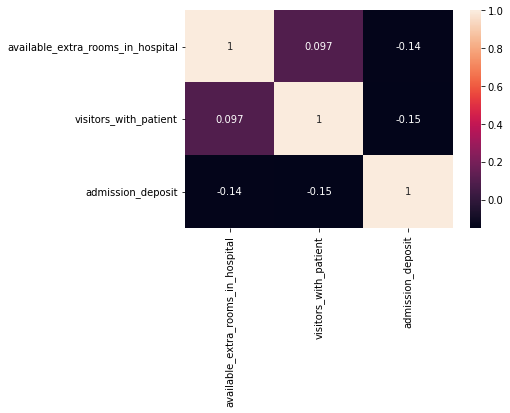

In [12]:
# Visualize numerical variables dataframe in correlation matrix
sns.heatmap(num_variables.corr(), annot=True)

No correlation found in the matrix; hence, no visible relationships between these variables

In [13]:
# Categorical variables
excluded_cols = df.columns.isin(["available_extra_rooms_in_hospital", "visitors_with_patient", "admission_deposit"])
# Use negation to select the remaining columns and name them cat_variables
included_cols = ~excluded_cols
cat_variables = df.loc[:, included_cols]
cat_variables.head()


,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,age,stay
0,1,8,c,3,Z,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,51-60,0-10
1,2,2,c,5,Z,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,51-60,41-50
2,3,10,e,1,X,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,51-60,31-40
3,4,26,b,2,Y,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,51-60,41-50
4,5,26,b,2,Y,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,51-60,41-50


### Basic Stats

In [14]:
cat_stats_df = pd.DataFrame(columns= ["column", "distinct_values", "no_distinct_records",
                                       "no_nn_records", "num_miss", "pct_miss"]).reset_index(drop=True)
stats_df = pd.DataFrame()

for attr in cat_variables.columns:
    stats_df["column"] = [attr]
    stats_df["distinct_values"] = [cat_variables[attr].unique()]
    stats_df["no_distinct_records"] = len(list(cat_variables[attr].unique()))
    stats_df["no_nn_records"] = int(cat_variables[attr].nunique())
    stats_df["num_miss"] = cat_variables[attr].isnull().sum()
    stats_df["pct_miss"] = (cat_variables[attr].isnull().sum()/len(cat_variables))*100
    cat_stats_df = cat_stats_df.append(stats_df)
pd.set_option("display.max_colwidth", None)

cat_stats_df



,column,distinct_values,no_distinct_records,no_nn_records,num_miss,pct_miss
0,case_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]",318438,318438,0,0.000000
0,hospital_code,"[8, 2, 10, 26, 23, 32, 1, 22, 16, 9, 6, 29, 12, 3, 21, 28, 27, 19, 5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18, 4, 7, 20]",32,32,0,0.000000
0,hospital_type_code,"[c, e, b, a, f, d, g]",7,7,0,0.000000
0,city_code_hospital,"[3, 5, 1, 2, 6, 9, 10, 4, 11, 7, 13]",11,11,0,0.000000
0,hospital_region_code,"[Z, X, Y]",3,3,0,0.000000
0,department,"[radiotherapy, anesthesia, gynecology, TB & Chest disease, surgery]",5,5,0,0.000000
0,ward_type,"[R, S, Q, P, T, U]",6,6,0,0.000000
0,ward_facility_code,"[F, E, D, B, A, C]",6,6,0,0.000000
0,bed_grade,"[2.0, 3.0, 4.0, 1.0, nan]",5,4,113,0.035486
0,patientid,"[31397, 63418, 8088, 28843, 109338, 115513, 84932, 44201, 33340, 83512, 64869, 30632, 128803, 82551, 88451, 21257, 48585, 110115, 127970, 100096, 37254, 25492, 130244, 74756, 91007, 6112, 74789, 117626, 68311, 49536, 107910, 53888, 42152, 107753, 107506, 117334, 119353, 85799, 64560, 2352, 122110, 93250, 25426, 118815, 56943, 45382, 18401, 123339, 1026, 55204, 87835, 29622, 1106, 33782, 67223, 22554, 22917, 65370, 109666, 35317, 27075, 100252, 67044, 4447, 115145, 22762, 40743, 105043, 78271, 79116, 102397, 109166, 110410, 89930, 73389, 35246, 114256, 349, 70634, 3372, 110599, 57838, 50729, 87198, 75296, 114931, 129018, 113730, 87761, 30323, 58691, 61943, 72300, 49838, 103367, 52406, 76262, 110113, 24375, 127332, ...]",92017,92017,0,0.000000


### Frequency Distribution

Nature of case_id in a dataset should be unique. Therefore, I would remove if there's any existing duplicated records. The code below indicates no such dup records. 

In [15]:
# Check duplicate with case_id
duplicates = df["case_id"].duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

0


['hospital_code', 'hospital_type_code', 'city_code_hospital', 'hospital_region_code', 'department', 'ward_type', 'ward_facility_code', 'bed_grade', 'city_code_patient', 'type_of_admission', 'severity_of_illness', 'age', 'stay']


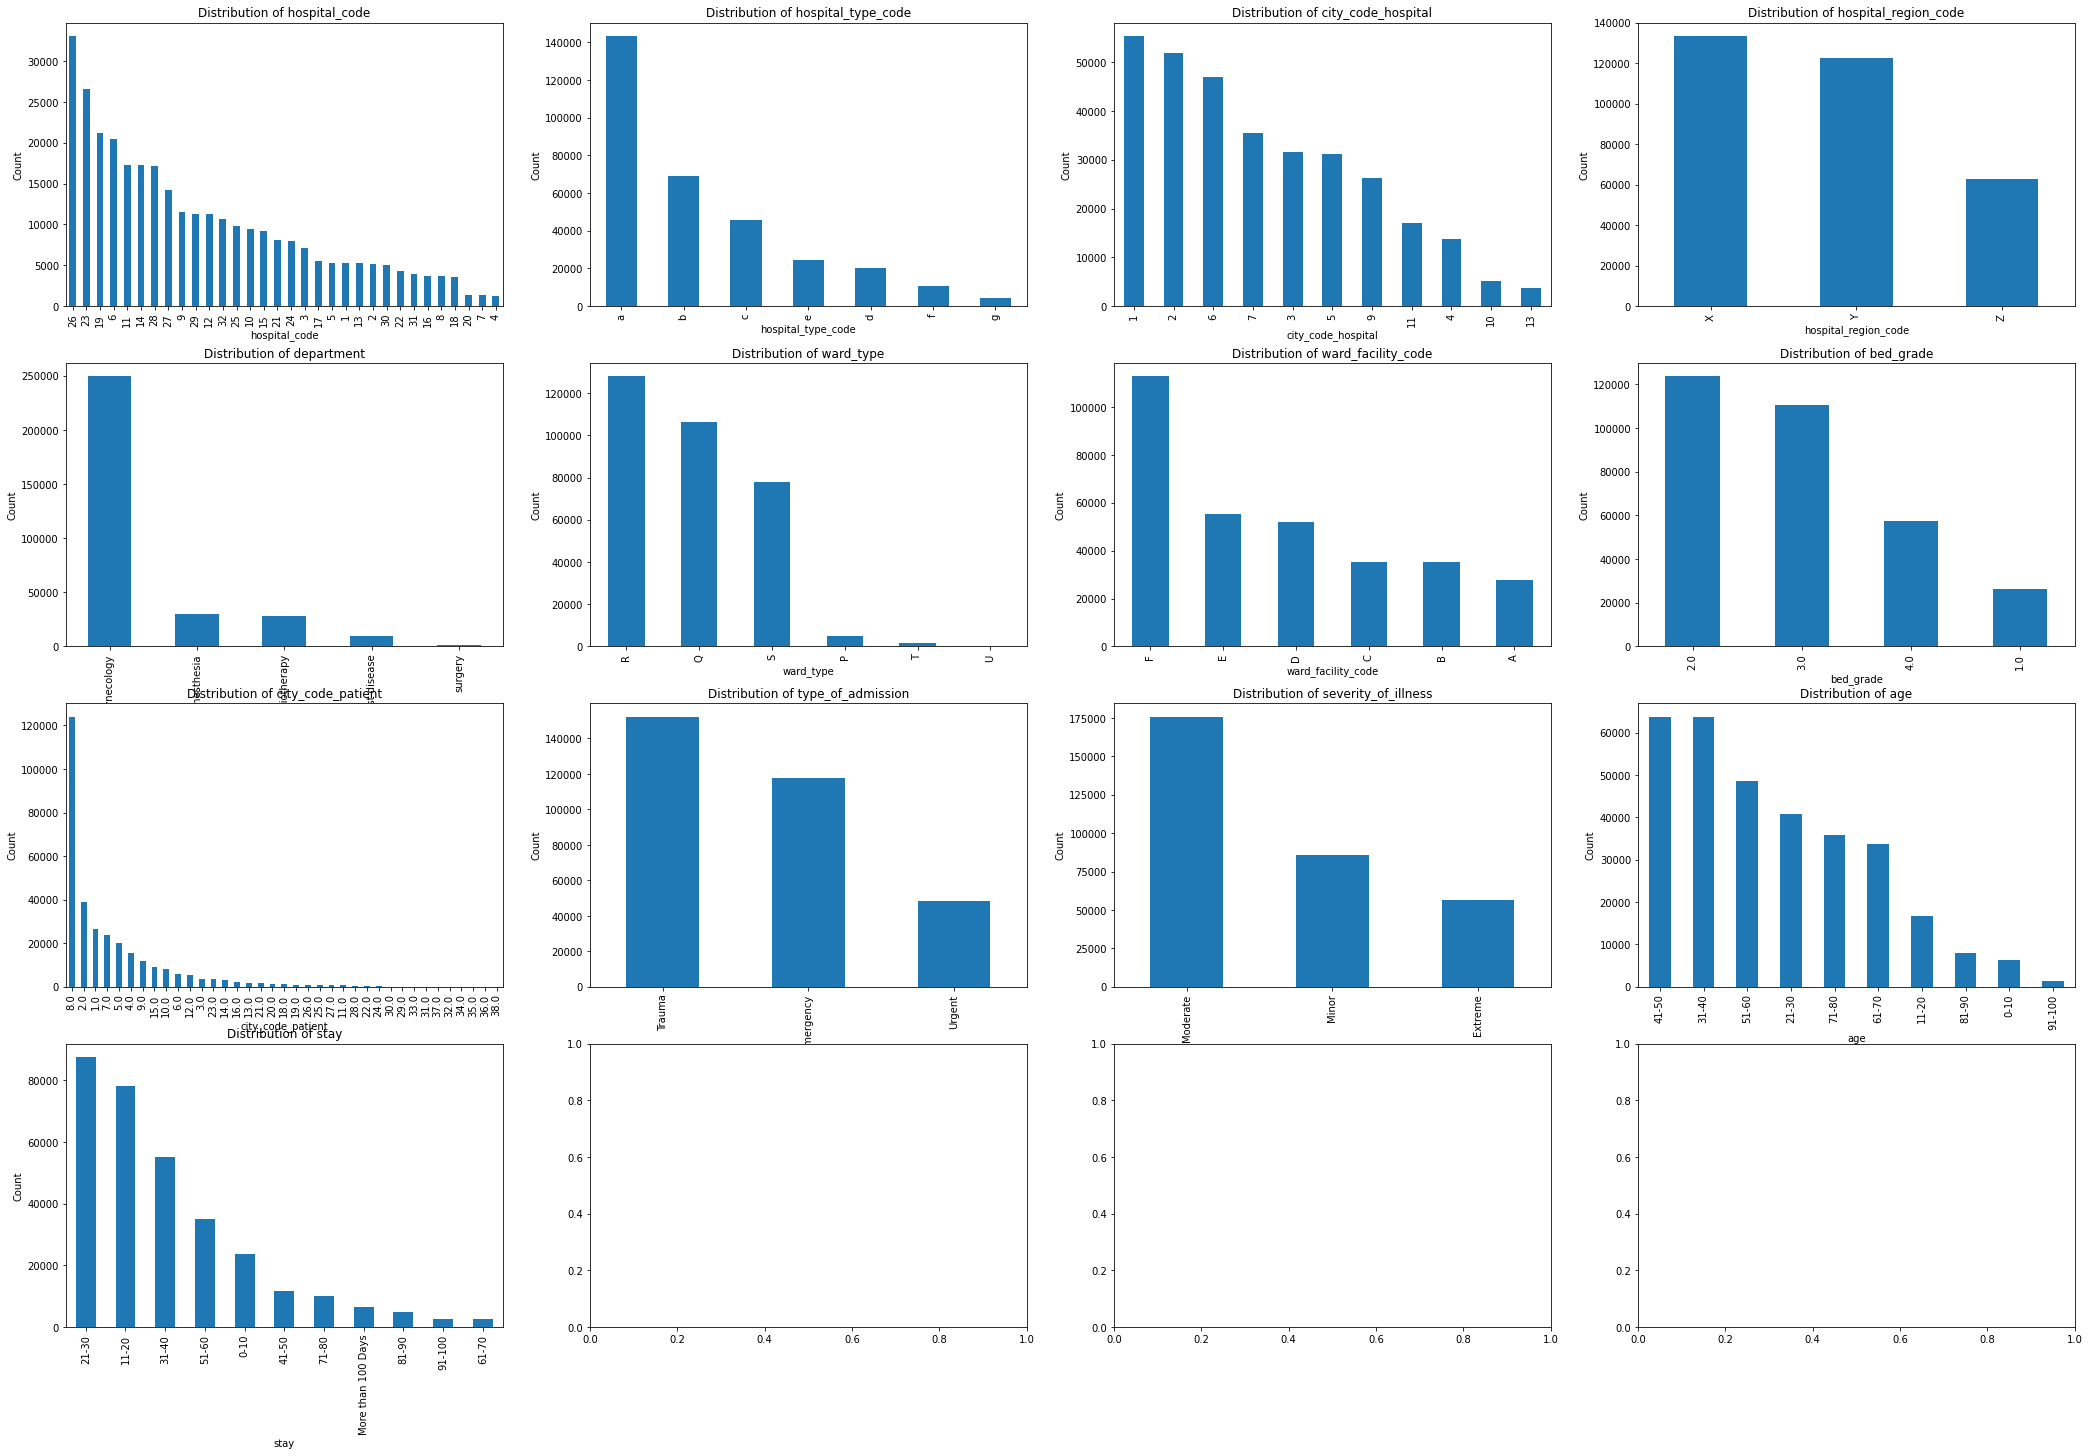

In [16]:
# Remove 2 fields id because it's not meaningful to visualize the distribution of the ids. 
lst_cat_cols = cat_variables.columns.to_list()
lst_cat_cols.remove("case_id")
lst_cat_cols.remove("patientid")
print(lst_cat_cols)

# Rows and cols for subplot grid
rows, cols = 4, 4 #because I have 12 charts total to display

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(36, 24))

# Then, I'm visualizing the distribution of the rest
plot_count = 0
for col in lst_cat_cols:
    ax = axes.flat[plot_count]
    # print(f"ax {ax}")
    cat_variables[col].value_counts().plot(kind="bar", ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col}")
    plot_count += 1
#Adjust spacing between subplots
# fig.tight_layout()
plt.show()

**Insights:** data is not equally distributed across features or the label (aka stay). There are major differences between the top and the last common values in some attributes (hospital_type_code, department, ward_type, and stay.)

Suggestion in later steps? - to remove the very minor groups in some attributes? How to measure the impact? 

### Bivariate Analysis

To analyse the relationship between the label (stay) and other features.

<Figure size 432x288 with 0 Axes>

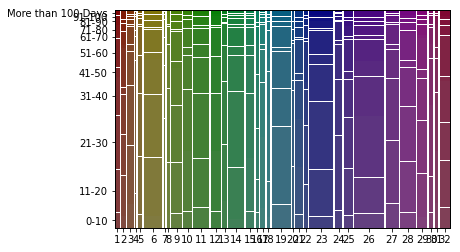

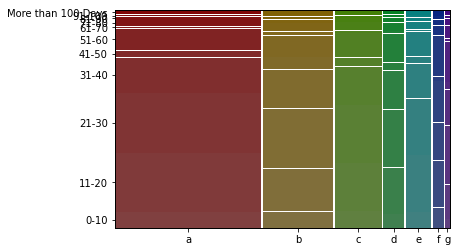

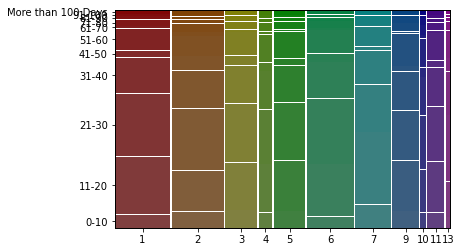

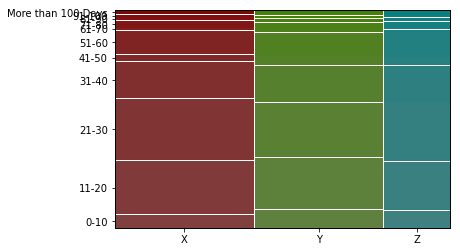

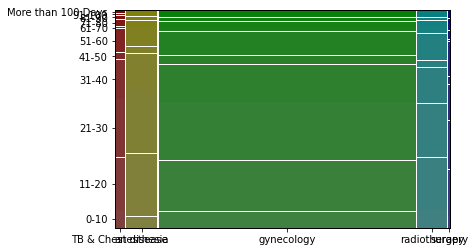

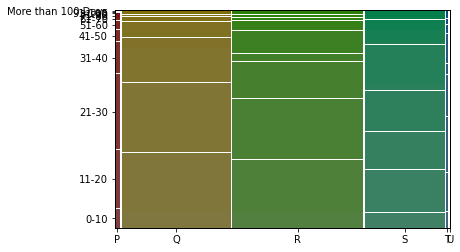

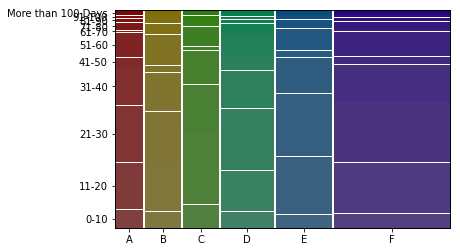

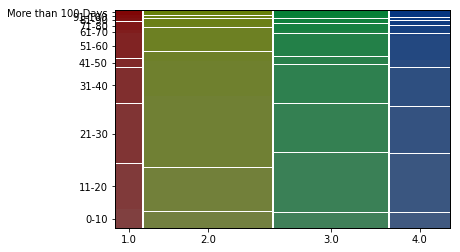

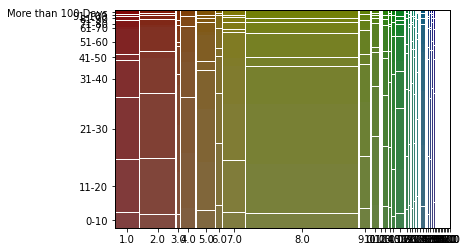

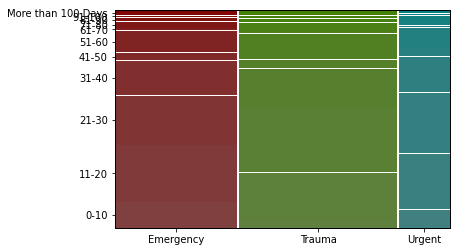

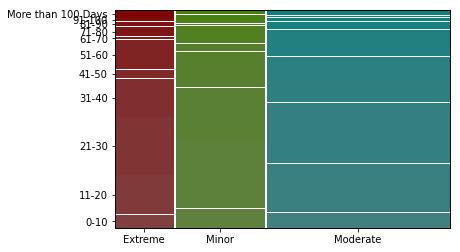

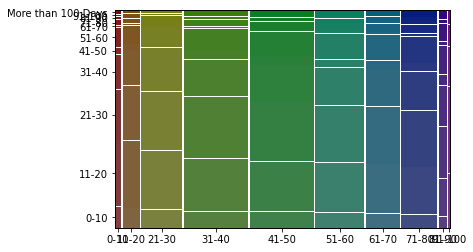

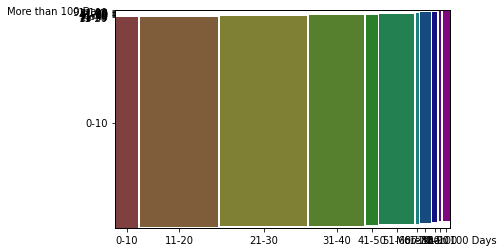

In [17]:
# Return an empty string
def empty_labelizer(key):
    return "" 

label = cat_variables["stay"]

plt.figure()

# Then, I'm visualizing the distribution of the rest
for col in lst_cat_cols:
    contigency_tab = pd.crosstab(cat_variables[col], label)
    mosaic(contigency_tab.stack(), labelizer=empty_labelizer)
    plt.show()



**Insights:** The series of Mosaic plots show the consistent unequal distributions between values in some attributes. And they also show the length of stay corresponding to each values of the attributes.

In [18]:
cat_variables.head(3)

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,age,stay
0,1,8,c,3,Z,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,51-60,0-10
1,2,2,c,5,Z,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,51-60,41-50
2,3,10,e,1,X,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,51-60,31-40


[]

<Figure size 1080x720 with 0 Axes>

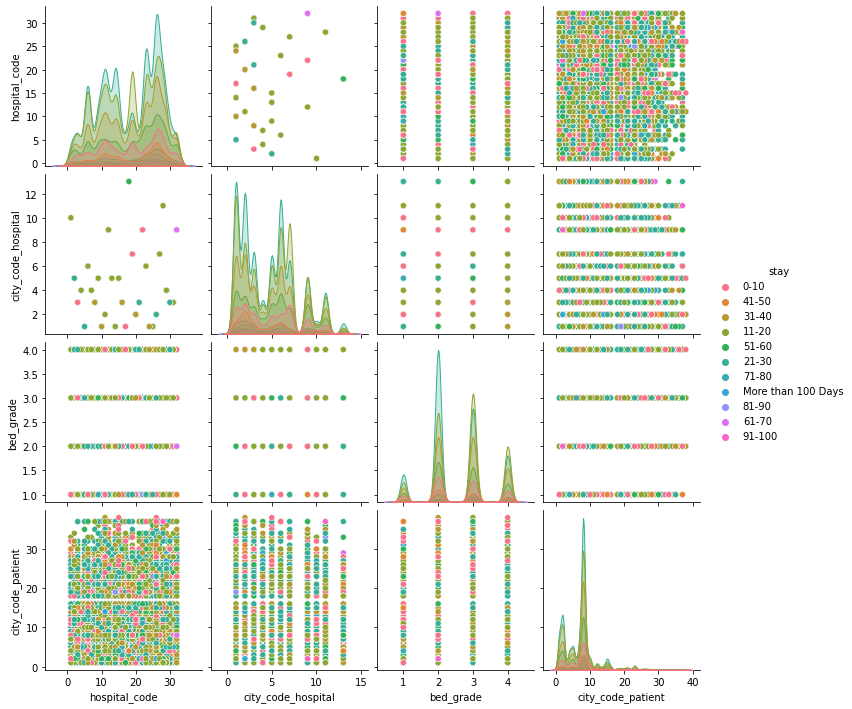

In [19]:
df_pairplot = cat_variables[["hospital_code", "hospital_type_code", "city_code_hospital", "hospital_region_code", "department", "ward_type", "ward_facility_code", "bed_grade", "city_code_patient", "type_of_admission", "severity_of_illness", "age", "stay"]]
plt.figure(figsize=(15,10))
sns.pairplot(df_pairplot,hue="stay")
# # plt.title("Relationship between variables")
# # # plt.legend("HeartDisease")
# plt.tight_layout()
plt.plot()

**Insights:** THe majority lengths of stay (11-60 days) are persistently perceived across different hospitals, cities, wards

## Data Preprocessing

### Handling Null Values

From metadata above, there are 2 fields containing null records, namely bed_grade & city_code_patient.  

In [20]:
# Handle Null values in 2 attributes Bed grade and city_code_patient

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(df[["bed_grade", "city_code_patient"]])
df[["bed_grade", "city_code_patient"]] = imputer.transform(df[["bed_grade", "city_code_patient"]])

In [21]:
# Change bed_grade and city_code_patient to int 

df = df.astype({"bed_grade": "int", "city_code_patient": "int"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   hospital_code                      318438 non-null  int64  
 2   hospital_type_code                 318438 non-null  string 
 3   city_code_hospital                 318438 non-null  int64  
 4   hospital_region_code               318438 non-null  string 
 5   available_extra_rooms_in_hospital  318438 non-null  int64  
 6   department                         318438 non-null  string 
 7   ward_type                          318438 non-null  string 
 8   ward_facility_code                 318438 non-null  string 
 9   bed_grade                          318438 non-null  int64  
 10  patientid                          318438 non-null  int64  
 11  city_code_patient                  3184

### Handling Categorical Variables

Before feeding data to any algorithms, it is the good practice to convert text data into numbers. For ordinal variables (bed_grade and severity_of_illness), I will use label encoding. And for nominal ones, I will use the combination of one-hot-encoding followed by PCA for dimensionality reduction.


#### Side note on One-hot encode.

For nominal variables, especially with ones having high dimensionality (many unique values), it is preferable to apply one-hot encoding technique for the following reasons:
1. Avoid any artificial ordering between categories that doesn't exist.
2. Highly interpretability for models utlizing decision trees algorithms
3. With variables that have many distinct values, label encoding might be inefficient for some algorithms.

<!-- To mitigate drawbacks of one-hot encoding technique, it is often used in combination of PCA (Principal Component Analysis), which is a technique used for dimensionality reduction.  -->

In [75]:
# import sklearn modules for datapreprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import FactorAnalysis

# Create a new dataframe for preprocessing
df_prep = df.copy()
# Declare target and feature varables
target = df_prep["stay"]
df_prep = df_prep.drop("stay", axis=1)

# Create a LabelEncoder object
le = LabelEncoder()

# Obtain data with 

# Declare 2 ordinal features
ordinal_features = ["bed_grade", "severity_of_illness"]

# label encode the 2 features
for feature in ordinal_features:
    df_prep[feature] = le.fit_transform(df_prep[feature])

df_prep.head(2)



,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit
0,1,8,c,3,Z,3,radiotherapy,R,F,1,31397,7,Emergency,0,2,51-60,4911.0
1,2,2,c,5,Z,2,radiotherapy,S,F,1,31397,7,Trauma,0,2,51-60,5954.0


In [76]:
# Nominal features
nominal_features = ["hospital_code", "hospital_type_code", "city_code_hospital",
                    "hospital_region_code", "department", "ward_type", "ward_facility_code",
                    "city_code_patient", "type_of_admission", "age"]
# len(nominal_features)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(df_prep[nominal_features]))

# Get encoded feature names
encoded_feature_names = encoder.get_feature_names(nominal_features)

# Name the columns 
encoded_data.columns = encoded_feature_names


In [77]:
df_prep = pd.concat([df_prep.drop(nominal_features, axis=1), encoded_data, target], axis=1)
df_prep.head(2)

,case_id,available_extra_rooms_in_hospital,bed_grade,patientid,severity_of_illness,visitors_with_patient,admission_deposit,hospital_code_1,hospital_code_2,hospital_code_3,...,age_11-20,age_21-30,age_31-40,age_41-50,age_51-60,age_61-70,age_71-80,age_81-90,age_91-100,stay
0,1,3,1,31397,0,2,4911.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0-10
1,2,2,1,31397,0,2,5954.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41-50


Before finalize the cleaning step, I will drop case_id and patientid because:
- For each record, one row represents one case_id. 
- Similar understanding of patientid, the patient admission is an independent event of hospital resources availability. 

In [79]:
df_prep.to_csv("cleaned_df.csv")

## Output

After conducting an indepth data analysis to develop the better understanding about the problem and its data, the dataset is cleansed and normalized to get ready for the next step - training the data with models. 